## Combine Entities Data
- For every corona virus sign and symptom, sum up the papers for all cardiomyopathy mesh descriptors and list it in one row. Do the same for all heart disease mesh descriptors.

In [34]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import json as json
import csv
% matplotlib inline
import seaborn as sns
sns.set()

We want to see the occurance of 'covid 19 sign and symptoms' and 'cardiomyopathy' all summed into a single row

In [35]:
with open("../corona_signs_id2name.json",'r')as rf:
    signs_id2name = json.load(rf)

In [36]:
with open("../../corona_signs_paper_ids.json", 'r') as fcount:
    signs_data = json.load(fcount)

In [37]:
with open("../cardiomyopathy_id2name.json",'r')as rf:
    cm_id2name = json.load(rf)

In [38]:
with open("../../cardiomyopathy_paper_ids.json", 'r') as fcount:
    cm_data = json.load(fcount)

In [39]:
allcm =[]
for k,v in cm_data.items():
    for item in v:
        allcm.append(item)

In [40]:
uallcm = list(set(allcm))
len(uallcm)

258

In [41]:
sign_cm_intersection = []
for sign in signs_data:
        overlap = set(signs_data[sign]).intersection(uallcm)
        sign_cm_intersection.append({"Signs": sign,\
                                      "Overlap with CM":len(list(overlap))})

In [42]:
DF_Sign_CM = DataFrame(sign_cm_intersection)

In [43]:
DF_Sign_CM = DF_Sign_CM.set_index("Signs")

In [44]:
DF_Sign_CM = DF_Sign_CM.sort_values('Overlap with CM', ascending=False)

In [45]:
DF_Sign_CM.to_csv('signs_cm-dkr.csv')

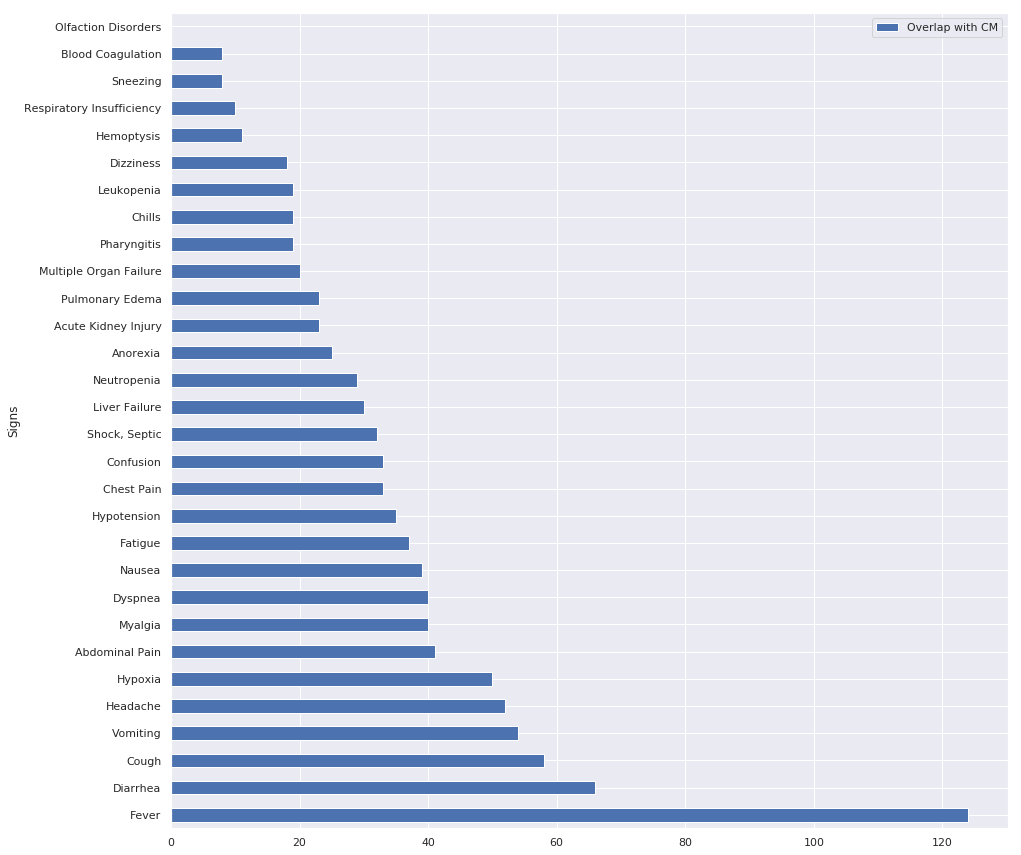

In [46]:
DF_Sign_CM.plot.barh(figsize = [15,15])

### Heart Failure

We want to see the occurance of 'covid 19 sign and symptoms' and 'HeartFailure' in a single document

In [47]:
with open("../heartfailure_id2name.json",'r')as rf:
    hf_id2name = json.load(rf)

In [48]:
with open("../../heartfailure_paper_ids.json", 'r') as fcount:
    hf_data = json.load(fcount)

In [49]:
allhf =[]
for k,v in hf_data.items():
    for item in v:
        allhf.append(item)

In [50]:
uallhf = list(set(allhf))
len(uallhf)

320

In [51]:
sign_hf_intersection = []
for sign in signs_data:
        overlap = set(signs_data[sign]).intersection(uallhf)
        sign_hf_intersection.append({"Signs": sign,\
                                      "Overlap with HF":len(list(overlap))})

In [52]:
DF_Sign_HF = DataFrame(sign_hf_intersection)

In [53]:
DF_Sign_HF = DF_Sign_HF.set_index("Signs")

In [54]:
DF_Sign_HF.sort_values('Overlap with HF', ascending=False)
DF_Sign_HF.head()

,Overlap with HF
Signs,
Pharyngitis,15
"Shock, Septic",85
Myalgia,31
Liver Failure,42
Hemoptysis,16


In [55]:
DF_Sign_HF.to_csv('signs_hf-dkr.csv')

In [56]:
DF_Sign_HF = DF_Sign_HF.sort_values('Overlap with HF', ascending=False)

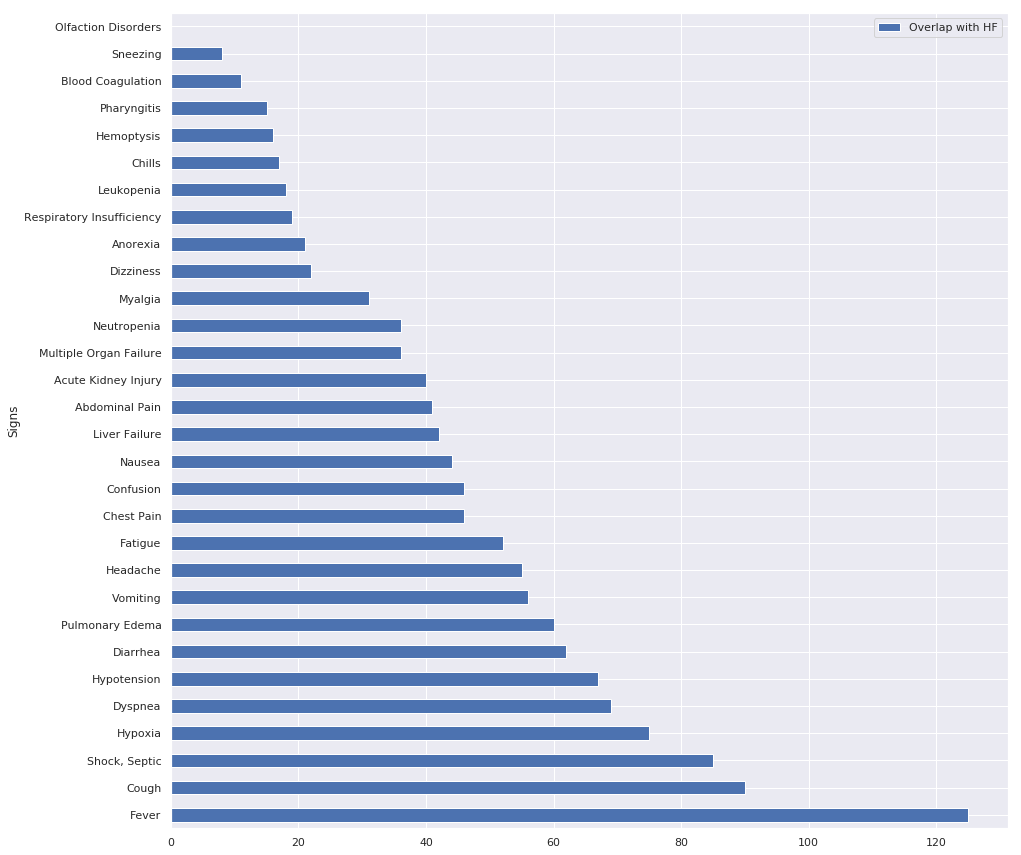

In [57]:
DF_Sign_HF.plot.barh(figsize = [15,15])

### Combined

In [58]:
NDF = DF_Sign_HF.copy(deep=True)

In [59]:
NDF["Overlap with CM"] = DF_Sign_CM["Overlap with CM"]

In [60]:
NDF.to_csv("cm-hf.csv")

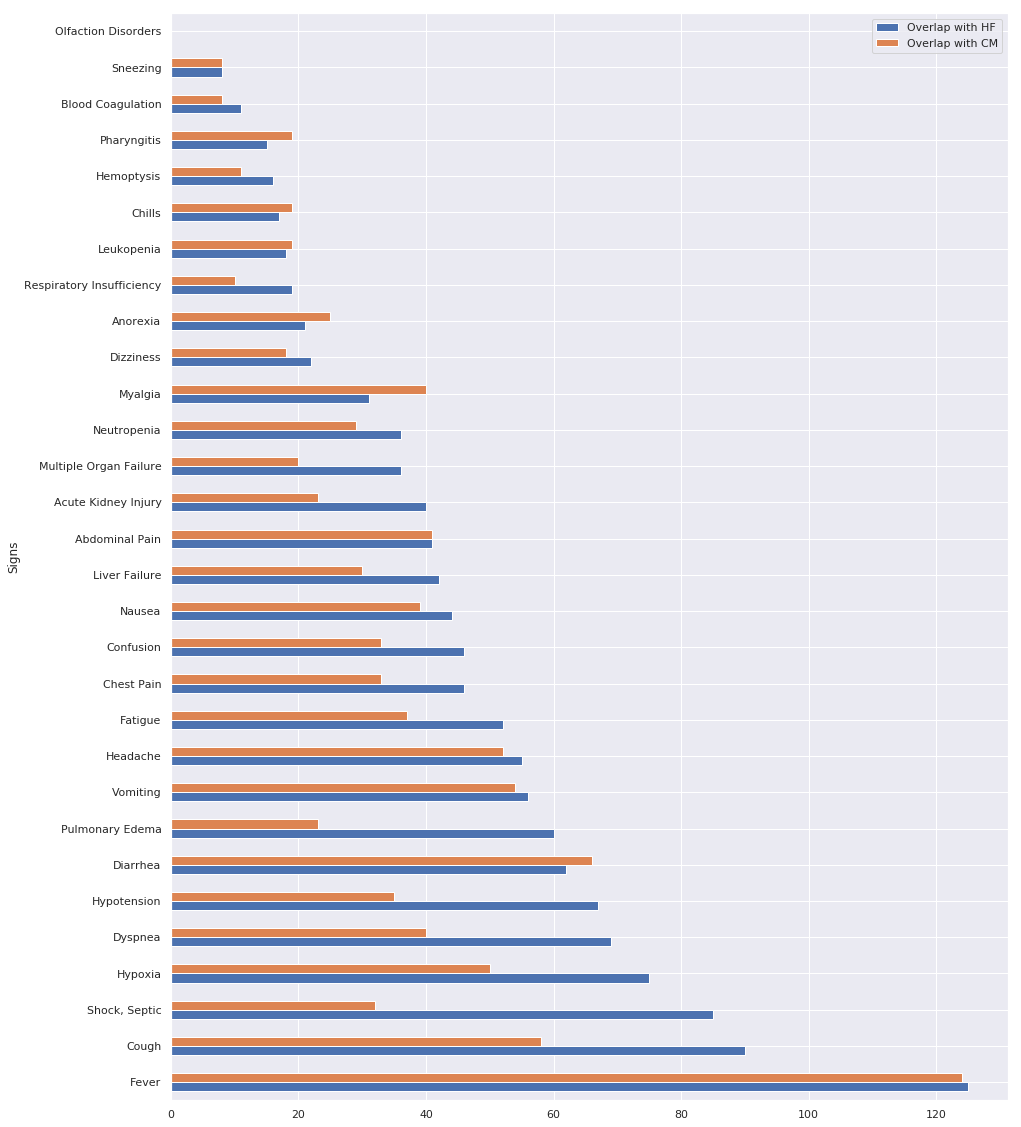

In [61]:
NDF.plot.barh(figsize = [15,20])
plt.savefig("cm-hf.pdf")